# Importation of the libraries and datasets

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
import statistics as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy as scipy
from scipy import stats


In [2]:
# FAO Dataframes

# FAO animal slaughter data
slaughter = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/FAOSTAT_slaughtered.csv", 
                        low_memory=False)

# FAO meat production data
meat = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/FAOSTAT_production_quantity.csv", 
                   low_memory=False)

# FAO livestock Stocking data
stock = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/FAOSTAT_stocks.csv", 
                    low_memory=False)

# FAO live stock import / export data
imp_exp = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/FAOSTAT_import_export.csv", 
                      low_memory=False)

# Exploratory data analysis

## Animal slaughter data

Here we view the head and shape of the data

In [3]:
slaughter.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2000,2000,Head,832926.0,NaN,Official data
1,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2001,2001,Head,873268.0,NaN,Official data
2,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2002,2002,Head,932473.0,NaN,Official data
3,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2003,2003,Head,853641.0,NaN,Official data
4,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2004,2004,Head,842585.0,NaN,Official data


In [4]:
slaughter.shape

(3746, 14)

In [5]:
slaughter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3746 entries, 0 to 3745
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       3746 non-null   object 
 1   Domain            3746 non-null   object 
 2   Area Code (FAO)   3746 non-null   int64  
 3   Area              3746 non-null   object 
 4   Element Code      3746 non-null   int64  
 5   Element           3746 non-null   object 
 6   Item Code (FAO)   3746 non-null   int64  
 7   Item              3746 non-null   object 
 8   Year Code         3746 non-null   int64  
 9   Year              3746 non-null   int64  
 10  Unit              3746 non-null   object 
 11  Value             3654 non-null   float64
 12  Flag              1401 non-null   object 
 13  Flag Description  3746 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 409.8+ KB


In [6]:
slaughter.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value
count,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3.654000e+03
mean,153.586759,5320.452483,1036.179391,1997.905499,1997.905499,1.232273e+07
std,98.639385,0.497803,73.686268,13.784635,13.784635,5.686957e+07
min,54.000000,5320.000000,867.000000,1973.000000,1973.000000,0.000000e+00
25%,79.000000,5320.000000,1017.000000,1986.000000,1986.000000,1.230950e+04
50%,106.000000,5320.000000,1058.000000,1999.000000,1999.000000,2.321095e+05
75%,231.000000,5321.000000,1080.000000,2010.000000,2010.000000,2.915900e+06
max,351.000000,5321.000000,1163.000000,2020.000000,2020.000000,7.449179e+08


The data is in its current layout is not suitable for statistical analysis as each country is a row.
I need to melt the data so that the values for each country are in a column item type.

In [7]:
slaughter.Item.unique()

array(['Meat, cattle', 'Meat, chicken', 'Meat, duck', 'Meat, goat',
       'Meat, horse', 'Meat, pig', 'Meat, sheep', 'Meat, turkey',
       'Meat, goose and guinea fowl', 'Meat, rabbit', 'Meat, game'],
      dtype=object)

There are 11 animal categories in the slaughter data. I can remove the repetition from these item categories when I clean the data

In [8]:
slaughter.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

The dataset contains 8 EU countries Belgium, Denmark, France, Germany, Luxembourg, Ireland, Italy and the Netherlands. All of these countries have been member states since at least Jan 1st 1973.

Belgium, France, Germany, Luxembourg, Italy and the Netherlands founded the EU in 1957 with Ireland and Denmark Joining on the 1st January 1973.

Therefore, to ensure data comparability between these countries and the US and China, I limited the datasets time frame from 1st January 1973 to 31st December 2020 (most recent data available). This ensures that all European countries were member states of the EU at the time of analysis. 

We can confirm this as follows

In [9]:
slaughter.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999], dtype=int64)

In [10]:
print(f"The earliest year in the dataset is {slaughter.Year.min()} and the maximum year is {slaughter.Year.max()}")

The earliest year in the dataset is 1973 and the maximum year is 2020


Next we can observe what units the slaughter data has been recorded in

In [11]:
slaughter.Unit.unique()

array(['Head', '1000 Head'], dtype=object)

Slaughter units have been reported as per "head" and per "thousand heads" of animal.

In [12]:
slaughter.Element.unique()

array(['Producing Animals/Slaughtered'], dtype=object)

All livestock in this dataset is at slaughter.

Checking for null values

In [13]:
slaughter.isnull().sum()

Domain Code            0
Domain                 0
Area Code (FAO)        0
Area                   0
Element Code           0
Element                0
Item Code (FAO)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                 92
Flag                2345
Flag Description       0
dtype: int64

In [14]:
# Function to calculate % missing

def calc_percent_missing(no_observations, maxobservations):
    '''This takes the number of missing and maximum observations as inputs. It
    then calculates the no of missing observations as a percentage of the total observations'''
    percent_miss = round((no_observations / maxobservations) * (100 / 1), 2)
    print(f"The percentage of missing values is:\n{percent_miss}")
    


In [15]:
calc_percent_missing(slaughter.isnull().sum(), len(slaughter))

The percentage of missing values is:
Domain Code          0.00
Domain               0.00
Area Code (FAO)      0.00
Area                 0.00
Element Code         0.00
Element              0.00
Item Code (FAO)      0.00
Item                 0.00
Year Code            0.00
Year                 0.00
Unit                 0.00
Value                2.46
Flag                62.60
Flag Description     0.00
dtype: float64


There are missing values in the "Value" and "Flag" columns.  The flag column is not important to our data analysis
so I can remove this during data preparation. However, the value column requires further investigation. We can test if these values are missing at random or not at random by filtering the values that are NaN or 0

In [16]:
# Creating a data frame of missing slaughtervalues
slaughter_miss = slaughter.loc[(slaughter['Value'] == slaughter.Value.isnull())]

In [17]:
slaughter_miss.head(50)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
789,QCL,Crops and livestock products,54,Denmark,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2018,2018,Head,0.0,NaN,Official data
790,QCL,Crops and livestock products,54,Denmark,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2019,2019,Head,0.0,NaN,Official data
791,QCL,Crops and livestock products,54,Denmark,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2020,2020,Head,0.0,NaN,Official data
2148,QCL,Crops and livestock products,104,Ireland,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2018,2018,Head,0.0,NaN,Official data
2149,QCL,Crops and livestock products,104,Ireland,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2019,2019,Head,0.0,NaN,Official data
2150,QCL,Crops and livestock products,104,Ireland,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2020,2020,Head,0.0,NaN,Official data
2844,QCL,Crops and livestock products,256,Luxembourg,5321,Producing Animals/Slaughtered,1058,"Meat, chicken",2018,2018,1000 Head,0.0,NaN,Official data
2845,QCL,Crops and livestock products,256,Luxembourg,5321,Producing Animals/Slaughtered,1058,"Meat, chicken",2019,2019,1000 Head,0.0,NaN,Official data
2846,QCL,Crops and livestock products,256,Luxembourg,5321,Producing Animals/Slaughtered,1058,"Meat, chicken",2020,2020,1000 Head,0.0,NaN,Official data
2847,QCL,Crops and livestock products,256,Luxembourg,5321,Producing Animals/Slaughtered,1069,"Meat, duck",2018,2018,1000 Head,0.0,NaN,Official data


In [18]:
# Investigating if the missing data is at random or not at random by checking if it's specific animal categories or not
slaughter_miss.Item.unique()

array(['Meat, goat', 'Meat, chicken', 'Meat, duck', 'Meat, horse',
       'Meat, turkey'], dtype=object)

In [19]:
slaughter_miss.Value.unique()

array([0.])

In [20]:
# Investigating if the missing data is at random or not at random by checking if it's specific country's or not
slaughter_miss.Area.unique()

array(['Denmark', 'Ireland', 'Luxembourg', 'Netherlands'], dtype=object)

In [21]:
slaughter_miss.Year.unique()

array([2018, 2019, 2020, 2000, 2001, 1973, 1974, 1975, 1976], dtype=int64)

This shows that the missing data is NOT at random, certain countries did not submit data for certain animal categories on certain years. I will deal with this during data preparation.

## Meat production data

In [22]:
meat.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2000,2000,tonnes,275360.0,NaN,Official data
1,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2001,2001,tonnes,285250.0,NaN,Official data
2,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2002,2002,tonnes,305388.0,NaN,Official data
3,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2003,2003,tonnes,275170.0,NaN,Official data
4,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2004,2004,tonnes,280931.0,NaN,Official data


In [23]:
meat.shape

(3940, 14)

In [24]:
meat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       3940 non-null   object 
 1   Domain            3940 non-null   object 
 2   Area Code (FAO)   3940 non-null   int64  
 3   Area              3940 non-null   object 
 4   Element Code      3940 non-null   int64  
 5   Element           3940 non-null   object 
 6   Item Code (FAO)   3940 non-null   int64  
 7   Item              3940 non-null   object 
 8   Year Code         3940 non-null   int64  
 9   Year              3940 non-null   int64  
 10  Unit              3940 non-null   object 
 11  Value             3862 non-null   float64
 12  Flag              1298 non-null   object 
 13  Flag Description  3940 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 431.1+ KB


In [25]:
meat.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value
count,3940.000000,3940.0,3940.000000,3940.000000,3940.000000,3.862000e+03
mean,154.790102,5510.0,1042.574873,1997.820051,1997.820051,1.300366e+06
std,99.951755,0.0,77.053159,13.754285,13.754285,4.658044e+06
min,54.000000,5510.0,867.000000,1973.000000,1973.000000,0.000000e+00
25%,79.000000,5510.0,1017.000000,1986.000000,1986.000000,4.966500e+03
50%,106.000000,5510.0,1058.000000,1999.000000,1999.000000,6.400000e+04
75%,231.000000,5510.0,1080.000000,2010.000000,2010.000000,6.888240e+05
max,351.000000,5510.0,1163.000000,2020.000000,2020.000000,5.766187e+07


The data is in its current layout is not suitable for statistical analysis as each country is a row.
I need to melt the data so that the values for each country are in a column item type.

In [26]:
meat.Item.unique()

array(['Meat, cattle', 'Meat, chicken', 'Meat, duck', 'Meat, goat',
       'Meat, horse', 'Meat, pig', 'Meat, sheep', 'Meat, turkey',
       'Meat, game', 'Meat, goose and guinea fowl', 'Meat, rabbit'],
      dtype=object)

There are 11 animal categories in the production data. I can remove the repetition from these item categories when I clean the data

In [27]:
meat.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

As above:

The dataset contains 8 EU countries Belgium, Denmark, France, Germany, Luxembourg, Ireland, Italy and the Netherlands. All of these countries have been member states since at least Jan 1st 1973.

Belgium, France, Germany, Luxembourg, Italy and the Netherlands founded the EU in 1957 with Ireland and Denmark Joining on the 1st January 1973.

Therefore, to ensure data comparability between these countries and the US and China, I limited the datasets time frame from 1st January 1973 to 31st December 2020 (most recent data available). This ensures that all European countries were member states of the EU at the time of analysis. 

We can confirm this as follows

In [28]:
meat.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999], dtype=int64)

In [29]:
print(f"The earliest year in the dataset is {meat.Year.min()} and the maximum year is {meat.Year.max()}")

The earliest year in the dataset is 1973 and the maximum year is 2020


Next we can observe what units the meat production data has been recorded in

In [30]:
meat.Unit.unique()

array(['tonnes'], dtype=object)

Production data units have been reported in "tonnes".

In [31]:
meat.Element.unique()

array(['Production'], dtype=object)

All livestock in this dataset is at production.

Checking for null values

In [32]:
meat.isnull().sum()

Domain Code            0
Domain                 0
Area Code (FAO)        0
Area                   0
Element Code           0
Element                0
Item Code (FAO)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                 78
Flag                2642
Flag Description       0
dtype: int64

In [33]:
calc_percent_missing(meat.isnull().sum(), len(meat))

The percentage of missing values is:
Domain Code          0.00
Domain               0.00
Area Code (FAO)      0.00
Area                 0.00
Element Code         0.00
Element              0.00
Item Code (FAO)      0.00
Item                 0.00
Year Code            0.00
Year                 0.00
Unit                 0.00
Value                1.98
Flag                67.06
Flag Description     0.00
dtype: float64


There are missing values in the "Value" and "Flag" columns.  The flag column is not important to our data analysis
so I can remove this during data preparation. However, the value column requires further investigation. We can test if these values are missing at random or not at random by filtering the values that are NaN or 0

In [34]:
# Creating a data frame of missing meat production
meat_miss = meat.loc[(meat['Value'] == meat.Value.isnull())]

In [35]:
meat_miss.head(50)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
883,QCL,Crops and livestock products,54,Denmark,5510,Production,1017,"Meat, goat",2018,2018,tonnes,0.0,NaN,Official data
884,QCL,Crops and livestock products,54,Denmark,5510,Production,1017,"Meat, goat",2019,2019,tonnes,0.0,NaN,Official data
885,QCL,Crops and livestock products,54,Denmark,5510,Production,1017,"Meat, goat",2020,2020,tonnes,0.0,NaN,Official data
1151,QCL,Crops and livestock products,54,Denmark,5510,Production,1080,"Meat, turkey",2018,2018,tonnes,0.0,NaN,Official data
1152,QCL,Crops and livestock products,54,Denmark,5510,Production,1080,"Meat, turkey",2019,2019,tonnes,0.0,NaN,Official data
1153,QCL,Crops and livestock products,54,Denmark,5510,Production,1080,"Meat, turkey",2020,2020,tonnes,0.0,NaN,Official data
1862,QCL,Crops and livestock products,79,Germany,5510,Production,1017,"Meat, goat",2018,2018,tonnes,0.0,NaN,Official data
1863,QCL,Crops and livestock products,79,Germany,5510,Production,1017,"Meat, goat",2019,2019,tonnes,0.0,NaN,Official data
1864,QCL,Crops and livestock products,79,Germany,5510,Production,1017,"Meat, goat",2020,2020,tonnes,0.0,NaN,Official data
2293,QCL,Crops and livestock products,104,Ireland,5510,Production,1017,"Meat, goat",2018,2018,tonnes,0.0,NaN,Official data


In [36]:
# Investigating if the missing data is at random or not at random by checking if it's specific animal categories or not
meat_miss.Item.unique()

array(['Meat, goat', 'Meat, turkey', 'Meat, chicken', 'Meat, duck',
       'Meat, horse', 'Meat, game'], dtype=object)

In [37]:
meat_miss.Value.unique()

array([0.])

In [38]:
# Investigating if the missing data is at random or not at random by checking if it's specific country's or not
meat_miss.Area.unique()

array(['Denmark', 'Germany', 'Ireland', 'Luxembourg', 'Netherlands'],
      dtype=object)

In [39]:
meat_miss.Year.unique()

array([2018, 2019, 2020, 2000, 2001, 1986, 2005], dtype=int64)

This shows that the missing data is NOT at random, certain countries did not submit data for certain animal categories on certain years. I will deal with this during data preparation.

In addition, it shows that the missing categories and years are similar to the Slaughter data. There may have been no requirement to report for these categories on these years.

## Livestock stocking data

In [40]:
stock.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2000,2000,Head,3041560.0,NaN,Official data
1,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2001,2001,Head,3037760.0,NaN,Official data
2,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2002,2002,Head,2891260.0,NaN,Official data
3,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2003,2003,Head,2778077.0,NaN,Official data
4,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2004,2004,Head,2738648.0,NaN,Official data


In [41]:
stock.shape

(3735, 14)

In [42]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       3735 non-null   object 
 1   Domain            3735 non-null   object 
 2   Area Code (FAO)   3735 non-null   int64  
 3   Area              3735 non-null   object 
 4   Element Code      3735 non-null   int64  
 5   Element           3735 non-null   object 
 6   Item Code (FAO)   3735 non-null   int64  
 7   Item              3735 non-null   object 
 8   Year Code         3735 non-null   int64  
 9   Year              3735 non-null   int64  
 10  Unit              3735 non-null   object 
 11  Value             3670 non-null   float64
 12  Flag              1103 non-null   object 
 13  Flag Description  3735 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 408.6+ KB


In [43]:
stock.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value
count,3735.000000,3735.000000,3735.000000,3735.00000,3735.00000,3.670000e+03
mean,154.917269,5111.448728,1033.941098,1997.31593,1997.31593,1.389960e+07
std,98.436050,0.497431,73.118241,13.67837,13.67837,5.001213e+07
min,54.000000,5111.000000,866.000000,1973.00000,1973.00000,2.000000e+00
25%,79.000000,5111.000000,1016.000000,1985.00000,1985.00000,8.278250e+03
50%,106.000000,5111.000000,1057.000000,1998.00000,1998.00000,1.960655e+05
75%,231.000000,5112.000000,1079.000000,2009.00000,2009.00000,6.134275e+06
max,351.000000,5112.000000,1140.000000,2020.00000,2020.00000,4.867429e+08


The data is in its current layout is not suitable for statistical analysis as each country is a row.
I need to melt the data so that the values for each country are in a column item type.

In [44]:
stock.Item.unique()

array(['Cattle', 'Chickens', 'Ducks', 'Geese and guinea fowls', 'Goats',
       'Horses', 'Pigs', 'Rabbits and hares', 'Sheep', 'Turkeys'],
      dtype=object)

There are 10 animal categories in the stocking data.

In [45]:
stock.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

As above:

The dataset contains 8 EU countries Belgium, Denmark, France, Germany, Luxembourg, Ireland, Italy and the Netherlands. All of these countries have been member states since at least Jan 1st 1973.

Belgium, France, Germany, Luxembourg, Italy and the Netherlands founded the EU in 1957 with Ireland and Denmark Joining on the 1st January 1973.

Therefore, to ensure data comparability between these countries and the US and China, I limited the datasets time frame from 1st January 1973 to 31st December 2020 (most recent data available). This ensures that all European countries were member states of the EU at the time of analysis. 

We can confirm this as follows

In [46]:
stock.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999], dtype=int64)

In [47]:
print(f"The earliest year in the dataset is {stock.Year.min()} and the maximum year is {stock.Year.max()}")

The earliest year in the dataset is 1973 and the maximum year is 2020


Next we can observe what units the livestock stocking data has been recorded in

In [48]:
stock.Unit.unique()

array(['Head', '1000 Head'], dtype=object)

Socking data units have been reported in "heads" and "1000 heads".

In [49]:
stock.Element.unique()

array(['Stocks'], dtype=object)

All livestock in this dataset is at production.

Checking for null values

In [50]:
stock.isnull().sum()

Domain Code            0
Domain                 0
Area Code (FAO)        0
Area                   0
Element Code           0
Element                0
Item Code (FAO)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                 65
Flag                2632
Flag Description       0
dtype: int64

In [51]:
calc_percent_missing(stock.isnull().sum(), len(stock))

The percentage of missing values is:
Domain Code          0.00
Domain               0.00
Area Code (FAO)      0.00
Area                 0.00
Element Code         0.00
Element              0.00
Item Code (FAO)      0.00
Item                 0.00
Year Code            0.00
Year                 0.00
Unit                 0.00
Value                1.74
Flag                70.47
Flag Description     0.00
dtype: float64


There are missing values in the "Value" and "Flag" columns.  The flag column is not important to our data analysis
so I can remove this during data preparation. However, the value column requires further investigation. We can test if these values are missing at random or not at random by filtering the values that are NaN or 0

In [52]:
stock.columns

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Item Code (FAO)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [53]:
# Creating a data frame of missing stocking densities
stock_miss = stock.loc[(stock['Value'] == stock.Value.isnull())]

The NaNs do not show up on filter, only those with a value of "Zero"

In [54]:
stock_miss.head(50)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description


In [55]:
# Investigating if the missing data is at random or not at random by checking if it's specific animal categories or not
stock_miss.Item.unique()

array([], dtype=object)

In [56]:
stock_miss.Value.unique()

array([], dtype=float64)

In [57]:
# Investigating if the missing data is at random or not at random by checking if it's specific country's or not
stock_miss.Area.unique()

array([], dtype=object)

In [58]:
stock_miss.Year.unique()

array([], dtype=int64)

## Import export data

In [59]:
imp_exp.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2000,2000,Head,59395.0,NaN,Official data
1,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2001,2001,Head,44232.0,NaN,Official data
2,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2002,2002,Head,61054.0,NaN,Official data
3,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2003,2003,Head,85727.0,NaN,Official data
4,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2004,2004,Head,100891.0,NaN,Official data


In [60]:
imp_exp.shape

(14411, 14)

In [61]:
imp_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14411 entries, 0 to 14410
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       14411 non-null  object 
 1   Domain            14411 non-null  object 
 2   Area Code (FAO)   14411 non-null  int64  
 3   Area              14411 non-null  object 
 4   Element Code      14411 non-null  int64  
 5   Element           14411 non-null  object 
 6   Item Code (FAO)   14411 non-null  int64  
 7   Item              14411 non-null  object 
 8   Year Code         14411 non-null  int64  
 9   Year              14411 non-null  int64  
 10  Unit              14411 non-null  object 
 11  Value             14263 non-null  float64
 12  Flag              2446 non-null   object 
 13  Flag Description  14411 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.5+ MB


In [62]:
imp_exp.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value
count,14411.000000,14411.000000,14411.000000,14411.000000,14411.000000,1.426300e+04
mean,154.272778,5764.227257,1023.589480,1998.889182,1998.889182,1.764494e+05
std,95.451054,150.154608,70.081096,14.211274,14.211274,7.850559e+05
min,54.000000,5608.000000,866.000000,1973.000000,1973.000000,0.000000e+00
25%,79.000000,5610.000000,976.000000,1987.000000,1987.000000,2.640000e+02
50%,106.000000,5622.000000,1034.000000,2000.000000,2000.000000,5.808000e+03
75%,231.000000,5910.000000,1079.000000,2012.000000,2012.000000,6.571350e+04
max,351.000000,5922.000000,1096.000000,2020.000000,2020.000000,1.589366e+07


The data is in its current layout is not suitable for statistical analysis as each country is a row.
I need to melt the data so that the values for each country are in a column item type.

In [63]:
imp_exp.Item.unique()

array(['Cattle', 'Chickens', 'Ducks', 'Goats', 'Horses', 'Pigs', 'Sheep',
       'Turkeys'], dtype=object)

There are 8 animal categories in the import export data. I can remove the repetition from these item categories when I clean the data

In [64]:
imp_exp.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

As above:

The dataset contains 8 EU countries Belgium, Denmark, France, Germany, Luxembourg, Ireland, Italy and the Netherlands. All of these countries have been member states since at least Jan 1st 1973.

Belgium, France, Germany, Luxembourg, Italy and the Netherlands founded the EU in 1957 with Ireland and Denmark Joining on the 1st January 1973.

Therefore, to ensure data comparability between these countries and the US and China, I limited the datasets time frame from 1st January 1973 to 31st December 2020 (most recent data available). This ensures that all European countries were member states of the EU at the time of analysis. 

We can confirm this as follows

In [65]:
imp_exp.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999], dtype=int64)

In [66]:
print(f"The earliest year in the dataset is {imp_exp.Year.min()} and the maximum year is {imp_exp.Year.max()}")

The earliest year in the dataset is 1973 and the maximum year is 2020


Next we can observe what units the import export data has been recorded in

In [67]:
imp_exp.Unit.unique()

array(['Head', 'tonnes', '1000 US$', '1000 Head'], dtype=object)

Import export data has been recorded in in "tonnes", "heads", "1000 US $" and "1000 heads".

In [68]:
imp_exp.Element.unique()

array(['Import Quantity', 'Import Value', 'Export Quantity',
       'Export Value'], dtype=object)

All livestock in this dataset is at production.

Checking for null values

In [69]:
imp_exp.isnull().sum()

Domain Code             0
Domain                  0
Area Code (FAO)         0
Area                    0
Element Code            0
Element                 0
Item Code (FAO)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                 148
Flag                11965
Flag Description        0
dtype: int64

In [70]:
calc_percent_missing(imp_exp.isnull().sum(), len(imp_exp))

The percentage of missing values is:
Domain Code          0.00
Domain               0.00
Area Code (FAO)      0.00
Area                 0.00
Element Code         0.00
Element              0.00
Item Code (FAO)      0.00
Item                 0.00
Year Code            0.00
Year                 0.00
Unit                 0.00
Value                1.03
Flag                83.03
Flag Description     0.00
dtype: float64


There are missing values in the "Value" and "Flag" columns.  The flag column is not important to our data analysis
so I can remove this during data preparation. However, the value column requires further investigation. We can test if these values are missing at random or not at random by filtering the values that are NaN or 0

In [71]:
# Creating a data frame of missing import export data 
imp_exp_miss = imp_exp.loc[(imp_exp['Value'] == imp_exp.Value.isnull())]

In [72]:
imp_exp_miss.head(50)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
214,TCL,Crops and livestock products,255,Belgium,5609,Import Quantity,1068,Ducks,2019,2019,1000 Head,0.0,NaN,Official data
215,TCL,Crops and livestock products,255,Belgium,5609,Import Quantity,1068,Ducks,2020,2020,1000 Head,0.0,NaN,Official data
216,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1068,Ducks,2014,2014,tonnes,0.0,NaN,Official data
217,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1068,Ducks,2016,2016,tonnes,0.0,NaN,Official data
220,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1068,Ducks,2019,2019,tonnes,0.0,NaN,Official data
221,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1068,Ducks,2020,2020,tonnes,0.0,NaN,Official data
240,TCL,Crops and livestock products,255,Belgium,5622,Import Value,1068,Ducks,2019,2019,1000 US$,0.0,NaN,Official data
257,TCL,Crops and livestock products,255,Belgium,5909,Export Quantity,1068,Ducks,2015,2015,1000 Head,0.0,NaN,Official data
264,TCL,Crops and livestock products,255,Belgium,5910,Export Quantity,1068,Ducks,2015,2015,tonnes,0.0,NaN,Official data
312,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1016,Goats,2014,2014,tonnes,0.0,NaN,Official data


In [73]:
# Investigating if the missing data is at random or not at random by checking if it's specific animal categories or not
imp_exp_miss.Item.unique()

array(['Ducks', 'Goats', 'Turkeys', 'Horses', 'Sheep', 'Cattle', 'Pigs',
       'Chickens'], dtype=object)

In [74]:
imp_exp_miss.Value.unique()

array([0.])

In [75]:
# Investigating if the missing data is at random or not at random by checking if it's specific country's or not
imp_exp_miss.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

In [76]:
imp_exp_miss.Year.unique()

array([2019, 2020, 2014, 2016, 2015, 2009, 2010, 2011, 2012, 2013, 1973,
       1974, 1975, 1976, 2018, 1977, 1978, 1981, 2005, 2006, 2008, 2017,
       1979, 1980, 1982, 1984, 1983, 1985, 2002, 1986, 1993, 1994, 1995,
       1997, 1998, 1987, 1988, 1989, 1990, 1996, 1999, 2000, 2001, 2003,
       2004, 2007, 1991, 1992], dtype=int64)

## Summary of EDA

Missing values account for a small number of the data in the Value columns of all datasets. Missing values have been recorded in two manners, some as "Zero" and others as a blank (NaN). The missing data is also not at random, it appears specific countries did not submit specific categories on specific years. The only other column with missing data is the flag data which is not useful to the analysis. NAN's do not show up on is.null filter, it is filtering the Zero values so I will need to manually remove these.

Additionally, a few null values have been recorded as "Zero" in the dataset where data was not available. These shall also need to be removed as they are outside the domain of the counts.

The data will also need to be melted into each country having its values in a column in order to be able to accurately perform statistical analysis.

# General Data preparation 

## Removing the Null values

In [77]:
# removing NANs and filtering out "Zero"

slaughter_clean = slaughter[slaughter['Value'].notnull()]
slaughter_clean = slaughter_clean.loc[slaughter_clean['Value'] != 0]

meat_clean = meat[meat['Value'].notnull()]
meat_clean = meat_clean.loc[meat_clean['Value'] != 0]

stock_clean = stock[stock['Value'].notnull()]
stock_clean = stock_clean.loc[stock_clean['Value'] != 0]

imp_exp_clean = imp_exp[imp_exp['Value'].notnull()]
imp_exp_clean = imp_exp_clean.loc[imp_exp_clean['Value'] != 0]

## Dropping useless columns

In [78]:
imp_exp_clean.columns

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Item Code (FAO)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [79]:
slaughter_clean = slaughter_clean.drop(["Domain Code","Domain","Area Code (FAO)", "Element Code",
                      "Item Code (FAO)", "Year Code", "Flag", "Flag Description"],axis=1)

meat_clean = meat_clean.drop(["Domain Code","Domain","Area Code (FAO)", "Element Code",
                      "Item Code (FAO)", "Year Code", "Flag", "Flag Description"],axis=1)
stock_clean = stock_clean.drop(["Domain Code","Domain","Area Code (FAO)", "Element Code",
                      "Item Code (FAO)", "Year Code", "Flag", "Flag Description"],axis=1)

imp_exp_clean = imp_exp_clean.drop(["Domain Code","Domain","Area Code (FAO)", "Element Code",
                      "Item Code (FAO)", "Year Code", "Flag", "Flag Description"],axis=1)

## Renaming column categories to more intuitive names 

In [80]:
slaughter_clean.Item.unique()

array(['Meat, cattle', 'Meat, chicken', 'Meat, duck', 'Meat, goat',
       'Meat, horse', 'Meat, pig', 'Meat, sheep', 'Meat, turkey',
       'Meat, goose and guinea fowl', 'Meat, rabbit'], dtype=object)

In [81]:
# Creating a function to rename the categorical variables in the data set to 
# easier to understand plain language English
def merge_similar_types(dataframe):
    '''This function takes in a traffic dataframe as input, it then maps vehicle categories in the
    'CountType' column to a single merged category and returns the changed dataframe'''
    dataframe['Element'] = dataframe['Element'].replace({
        'Producing Animals/Slaughtered': 'Slaughtered'
    })
    dataframe['Item'] = dataframe['Item'].replace({
        'Meat, cattle': 'Cattle', 'Meat, chicken': 'Chicken', 'Meat, duck': 'Duck',
        'Meat, goat': 'Goat', 'Meat, horse': 'Horse', 'Meat, pig': 'Pig',
        'Meat, sheep': 'Sheep', 'Meat, turkey': 'Turkey', 
        'Meat, goose and guinea fowl': 'Goose and Guinea fowl',
        'Meat, rabbit': 'Rabbit'
    })
    dataframe['Unit'] = dataframe['Unit'].replace({
        'tonnes': 'Tonnes'
    })
    return dataframe

In [82]:
# Implementation of plain language english function
slaughter_clean = merge_similar_types(slaughter_clean)

meat_clean = merge_similar_types(meat_clean)

stock_clean = merge_similar_types(stock_clean)

imp_exp_clean = merge_similar_types(imp_exp_clean)

## Adding geocodes

In [83]:
# Here the country codes file is imported and the head shown

country_codes = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/country_codes.tsv", sep='\t')
country_codes.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Albania,AL,ALB,8
2,Algeria,DZ,DZA,12
3,American Samoa,AS,ASM,16
4,Andorra,AD,AND,20


def add_geo(dataframe):
    for area in dataframe['Area']:
        if area in dataframe['Area'] == country_codes['Country'].value:
            dataframe['Geocode'] = country_codes['Country'].value
            return dataframe
        else:
            pass

def add_geo(dataframe):
    for country in dataframe['Area']:
        for i in country_codes['Country']:
            if country.value == country_codes['Country'].value:
                dataframe['Geocode'] == country_codes['Country'].value:
                    return dataframe
            else:
                print("This failed")

for i in slaughter_clean['Area']:
    print(i)

for i in country_codes[Country]:
    print(i)

for i in country_codes[country]:
    print(i)

slaughter_clean.Area.unique()

def add_geo(dataframe):
    if dataframe['Area'] == "Ireland":
        dataframe['Code'] = "IRL"
    elif dataframe['Area'] == "France":
        dataframe['Code'] = "FRA"
    elif dataframe['Area'] == "Belgium":
        dataframe['Code'] = "BEL"
    elif dataframe['Area'] == "China":
        dataframe['Code'] = "CHN"
    elif dataframe['Area'] == "Denmark":
        dataframe['Code'] = "DNK"
    elif dataframe['Area'] == "Germany":
        dataframe['Code'] = "DEU"
    elif dataframe['Area'] == "Italy":
        dataframe['Code'] = "ITA"
    elif dataframe['Area'] == "Luxembourg":
        dataframe['Code'] = "LUX"
    elif dataframe['Area'] == "Netherlands":
        dataframe['Code'] = "NLD"
    elif dataframe['Area'] == "United States of America":
        dataframe['Code'] = "USA"
    else: pass
    return dataframe

def add_geo(df):
    df['Code'] = df.loc[df['Area'] == "Ireland", df['Code']] = "IRE"

test = add_geo(slaughter_clean)

test.head()

test.head()

## Adding a  column of the values on a logarithmic scale

In [84]:
def log_values(dataframe):
    '''This function takes a a dataframe as input logs the values in the
    Value column and places them into a new column called log values.'''
    dataframe['LogValue'] = np.log10(dataframe['Value'])
    return dataframe

In [85]:
slaughter_clean = log_values(slaughter_clean)
meat_clean = log_values(meat_clean)
stock_clean = log_values(stock_clean)
imp_exp_clean = log_values(imp_exp_clean)

In [86]:
slaughter_clean.head()

,Area,Element,Item,Year,Unit,Value,LogValue
0,Belgium,Slaughtered,Cattle,2000,Head,832926.0,5.920606
1,Belgium,Slaughtered,Cattle,2001,Head,873268.0,5.941148
2,Belgium,Slaughtered,Cattle,2002,Head,932473.0,5.969636
3,Belgium,Slaughtered,Cattle,2003,Head,853641.0,5.931275
4,Belgium,Slaughtered,Cattle,2004,Head,842585.0,5.925614


In [87]:
meat_clean.head()

,Area,Element,Item,Year,Unit,Value,LogValue
0,Belgium,Production,Cattle,2000,Tonnes,275360.0,5.439901
1,Belgium,Production,Cattle,2001,Tonnes,285250.0,5.455226
2,Belgium,Production,Cattle,2002,Tonnes,305388.0,5.484852
3,Belgium,Production,Cattle,2003,Tonnes,275170.0,5.439601
4,Belgium,Production,Cattle,2004,Tonnes,280931.0,5.448600


# Data visualisation - come back here

<Figure size 1080x360 with 0 Axes>

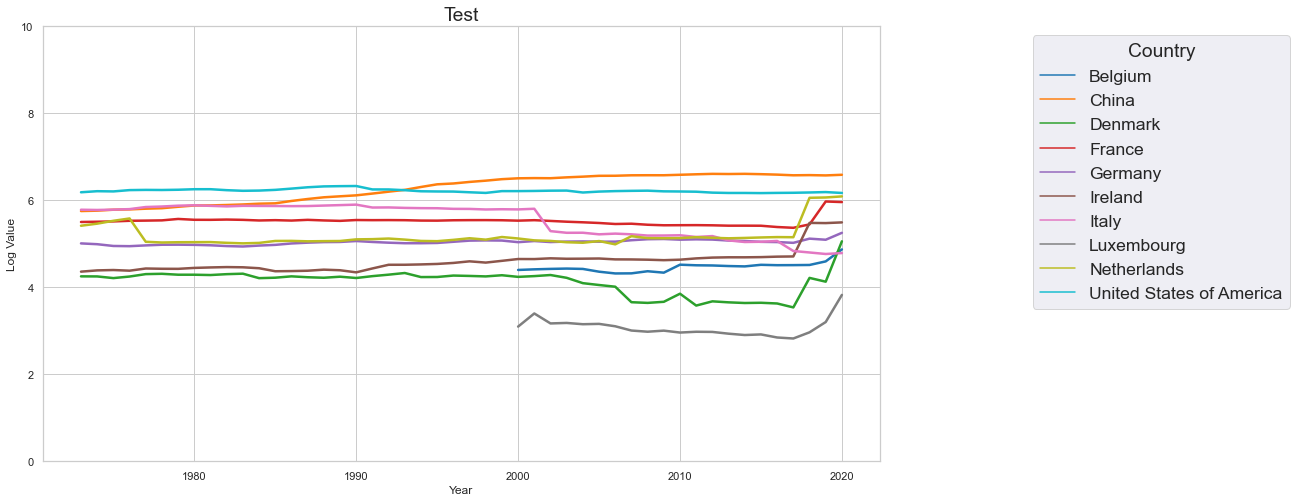

In [88]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 5));
fig, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale = 1.6);
vt = sns.lineplot(data = slaughter_clean, x = "Year", y = "LogValue", hue="Area",
                 palette="tab10", linewidth=2.5, ci=None)
vt = ax.set_ylim(0, 10);
plt.title("Test");
plt.xlabel("Year");
plt.ylabel("Log Value");
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), title="Country");


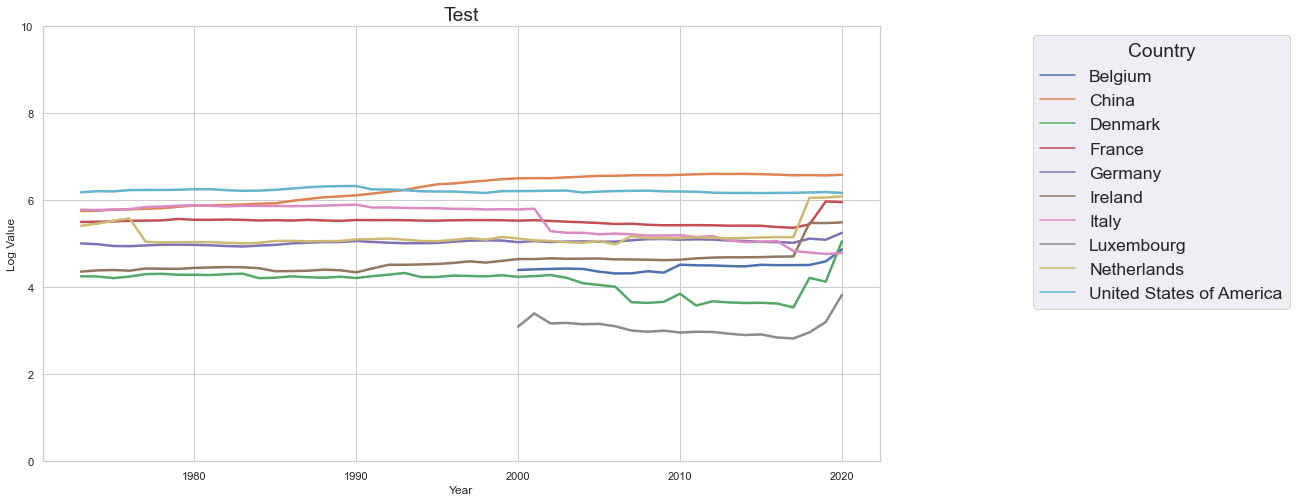

In [89]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(15,8));
sns.set(font_scale = 1.6);
vt = sns.lineplot(data = slaughter_clean, x = "Year", y = "LogValue", hue="Area",
                 linewidth=2.5, ci=None)
vt = ax.set_ylim(0, 10);
plt.title("Test");
plt.xlabel("Year");
plt.ylabel("Log Value");
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), title="Country");


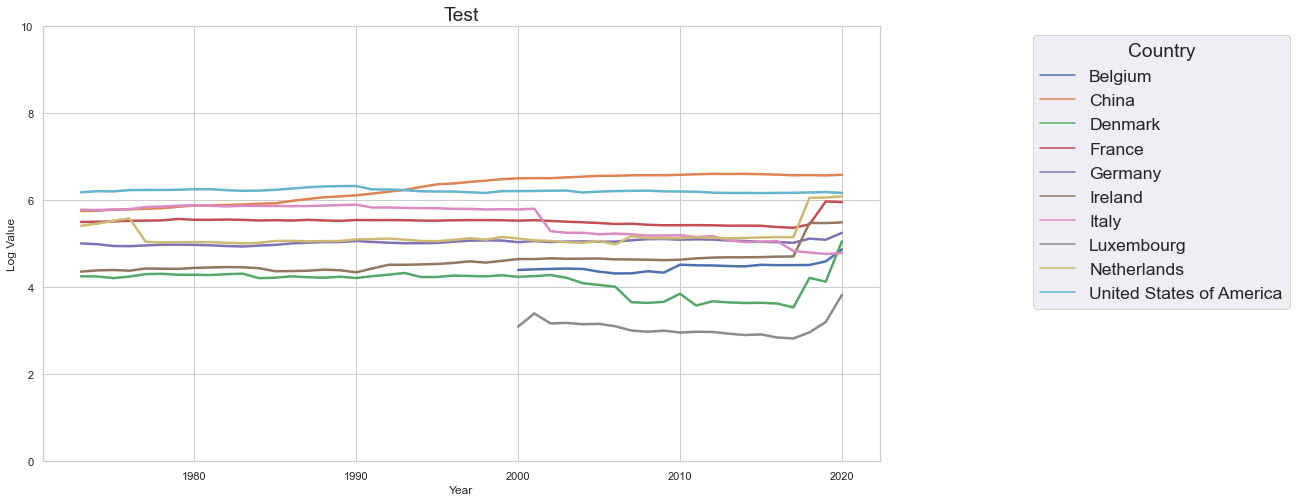

In [90]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(15,8));
sns.set(font_scale = 1.6);
vt = sns.lineplot(data = slaughter_clean, x = "Year", y = "LogValue", hue="Area",
                 linewidth=2.5, ci=None)
vt = ax.set_ylim(0, 10);
plt.title("Test");
plt.xlabel("Year");
plt.ylabel("Log Value");
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), title="Country");


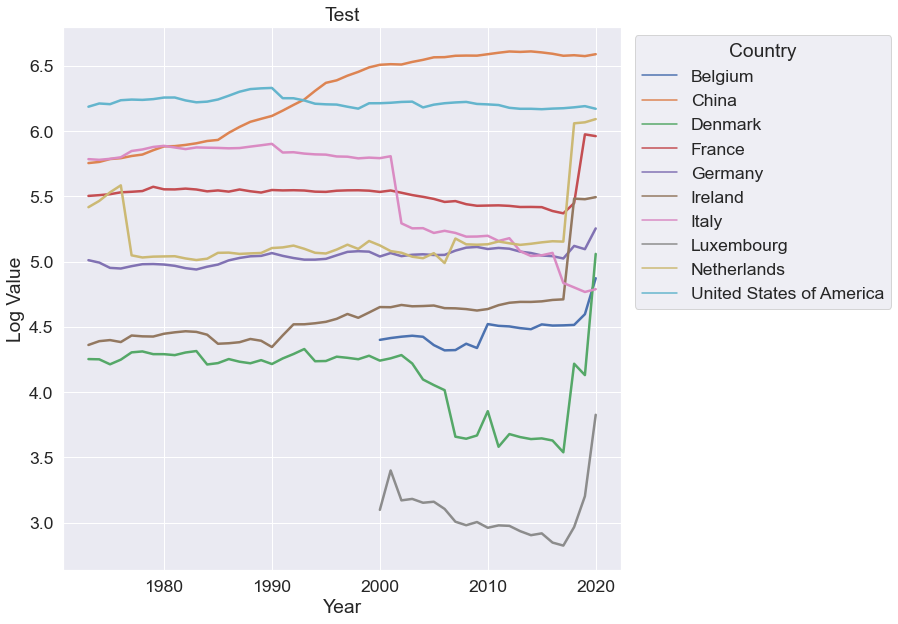

In [91]:
plt.figure(figsize=(10, 10));
sns.set(font_scale = 1.6);
sns.lineplot(data = slaughter_clean, x='Year', y="LogValue", hue="Area",
            linewidth=2.5, ci=None);
plt.title("Boxplot of CountValue total values for vehicles and pedestrians by day of the week");
plt.xlabel("Day of the week");
plt.ylabel("CountValue");
plt.title("Test");
plt.xlabel("Year");
plt.ylabel("Log Value");
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), title="Country");

# Statistical analysis 

In [92]:
# Creation of a function to create QQ plots to visualise distributions

def see_normality(dataframe):
    fig, ax = plt.subplots(figsize=(8, 8));
    sns.set(font_scale = 1.4);
    stats.probplot(dataframe.Value, plot=plt);
    plt.figure();

## Testing normality of the distributions

### Animal Slaughter data 

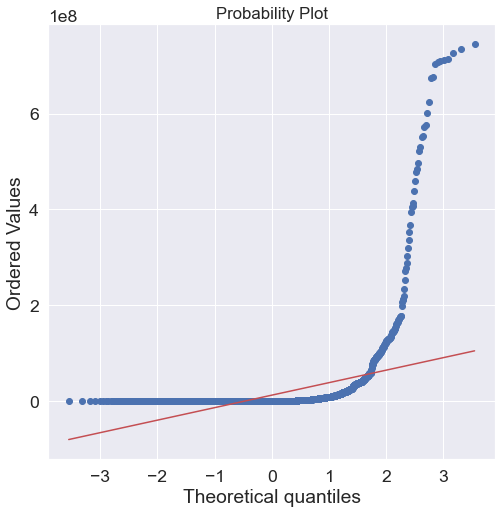

<Figure size 432x288 with 0 Axes>

In [93]:
#Normality plot.

see_normality(slaughter_clean)

To compliment the QQ plot, next we perform a Shapiro-Wilks test to statistically confirm if the distribution is normal or non-normal.

<b>The null hypothesis (H0) for the Shapiro-Wilk test is that "a variable is normally distributed in a population".</b>

In [94]:
# Performing a Shapiro wilks test to confirm the data if the data is or is not
# normally distributed.

stats.shapiro(slaughter_clean.Value)

ShapiroResult(statistic=0.20885485410690308, pvalue=0.0)

The QQ plot does not show a linear plot typically associated with normal distributions. In addition, the Shapiro-Wilks test
has a p-value below 0.05 so we reject the null hypothesis that "the variable is normally distributed"

Thus, we conclude the distribution of the animal slaughter data is non-normal.

### Meat production data 

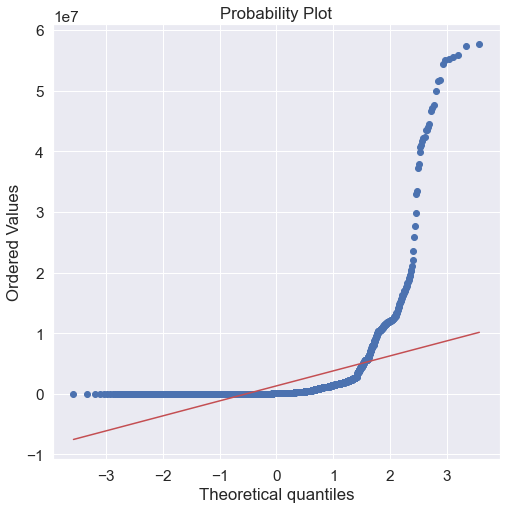

<Figure size 432x288 with 0 Axes>

In [95]:
see_normality(meat_clean)

In [96]:
stats.shapiro(meat_clean.Value)

ShapiroResult(statistic=0.2809247374534607, pvalue=0.0)

The QQ plot does not show a linear plot typically associated with normal distributions. In addition, the Shapiro-Wilks test
has a p-value below 0.05 so we reject the null hypothesis that "the variable is normally distributed"

Thus, we conclude the distribution of the meat production data is non-normal.

### Livestock stocking data 

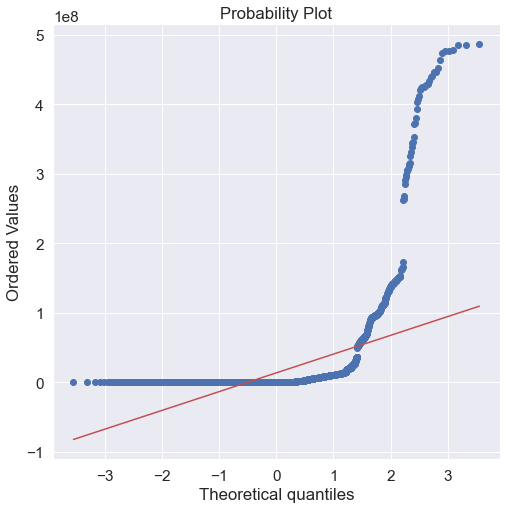

<Figure size 432x288 with 0 Axes>

In [97]:
see_normality(stock_clean)

In [98]:
stats.shapiro(stock_clean.Value)

ShapiroResult(statistic=0.29074954986572266, pvalue=0.0)

The QQ plot does not show a linear plot typically associated with normal distributions. In addition, the Shapiro-Wilks test
has a p-value below 0.05 so we reject the null hypothesis that "the variable is normally distributed"

Thus, we conclude the distribution of the livestock stocking data is non-normal.

### Import export data

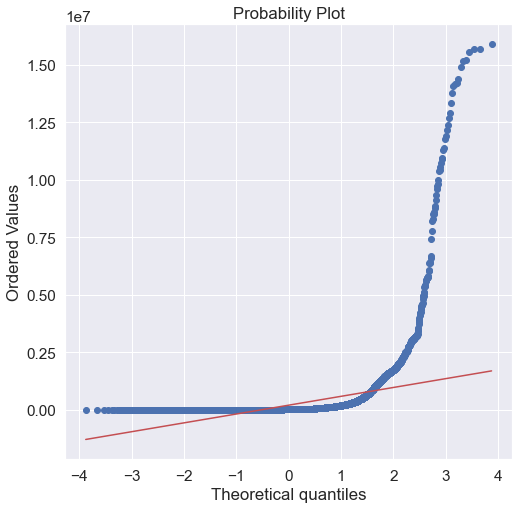

<Figure size 432x288 with 0 Axes>

In [99]:
see_normality(imp_exp_clean)

In [100]:
stats.shapiro(imp_exp_clean.Value)

C:\Users\shaun\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.22003084421157837, pvalue=0.0)

The QQ plot does not show a linear plot typically associated with normal distributions. In addition, the Shapiro-Wilks test
has a p-value below 0.05 so we reject the null hypothesis that "the variable is normally distributed"

Thus, we normally we would conclude the distribution of the import export data is non-normal.

However, the Scipy stats module has given a warning that the Shapiro-Wilks test 'p-value may not be accurate for datasets containing n > 5,000'. Therefore, we can perform an additional Kolmogorov-Smirnov test (KS-test) to test for normality. 

In addition, we shall test if this is a problem for the other datasets using count().

In [101]:
# Checking all the data sets to see if the >5,000 observations issue affects 
# any data set other than the import / export data
print(f"The animal slaughter dataset count is \n{slaughter_clean.count()}")
print(f"The meat production dataset count is \n{meat_clean.count()}")
print(f"The livestock stocking dataset count is \n{stock_clean.count()}")
print(f"The import export dataset count is \n{imp_exp_clean.count()}")

The animal slaughter dataset count is 
Area        3625
Element     3625
Item        3625
Year        3625
Unit        3625
Value       3625
LogValue    3625
dtype: int64
The meat production dataset count is 
Area        3830
Element     3830
Item        3830
Year        3830
Unit        3830
Value       3830
LogValue    3830
dtype: int64
The livestock stocking dataset count is 
Area        3670
Element     3670
Item        3670
Year        3670
Unit        3670
Value       3670
LogValue    3670
dtype: int64
The import export dataset count is 
Area        12988
Element     12988
Item        12988
Year        12988
Unit        12988
Value       12988
LogValue    12988
dtype: int64


This confirms only the import export data set is too large for the Shapiro Wilks test. Next we can use the Kolmogorov-Smirnov test (KS-test) to re-test the normality of the larger import export data set.

In [102]:
from scipy.stats import kstest, norm
ks_statistic, p_value = kstest(imp_exp_clean.Value, 'norm')
print(ks_statistic, p_value)

0.9836362430216499 0.0


The KS-test confirms the Shapiro-Wilks and QQ plot results that the import export data is not normally distributed.

### Summary of distribution testing 

The distribution of all four imported datasets (slaughter, meat production, livestock, and import/export) is not normal as demonstrated by their QQ plots and the results of the Shapiro-Wilks tests. All four datasets Shapiro-Wilks tests had p value below 0.05 and rejected the Null Hypothesis that the "data is evenly distributed". In addition, as the import_export dataset was too large for an accurate  Shapiro-Wilks (SW) normality test, a KS-test was performed to confirm the distribution results observed by the SW test and the QQ plot. The KS-test confirmed the import export data is also non-normally distributed.

Therefore, we can conclude all four data sets have a non-normal distribution. 

This means data sets cannot be analysed by tests that require a normal distribution. For example, a T-test, ANOVA, Pearson correlation or Linear regression will not be suitable as these require the data to be normally distributed. We must use tests that are appropriate to non-normally distributed data. 

## Data preparation for statistical analysis

For Statistical analysis I intend to compare if there is any difference between Ireland and other European countries in addition to the US and China in animals slaughtered, meat production and livestock stocking densities.


### Taking a subset of the data

Due to the large size of the data set,  a subset of animals and countries shall be selected for statistical analysis. In addition, comparisons will only be performed between the slaughter data and the meat production datasets.

The subsets shall include:

Animals = "Cattle", "Chicken", , "Pig", ", "Sheep"

Countries = "Ireland", "France", "Germany", "Italy", "Netherlands", "China", "USA"

In [103]:
# Creating a function to subset the data sets

def stat_subset(dataframe):
    df = dataframe.loc[(dataframe['Item'] == "Cattle")| 
                                      (dataframe['Item'] == "Chicken")|
                                      (dataframe['Item'] == "Pig")|
                                      (dataframe['Item'] == "Sheep")]
    df = df.loc[(df['Area'] == "Ireland")|
                        (df['Area'] == "France")|
                        (df['Area'] == "Germany")|
                        (df['Area'] == "Italy")|
                        (df['Area'] == "Netherlands")|
                        (df['Area'] == "China")|
                        (df['Area'] == "United States of America")]
    return df

In [104]:
slaughter_subset = stat_subset(slaughter_clean)
meat_subset = stat_subset(meat_clean)
livestock_subset = stat_subset(stock_clean)

In [105]:
# Testing that the dataframes have been properly subsetted by the function

print(f"Slaughter countries:{slaughter_subset.Item.unique()}\n")
print(f"Slaughter animals:{slaughter_subset.Area.unique()}\n")
print(f"Meat production countries:{meat_subset.Item.unique()}\n")
print(f"Meat production animals:{meat_subset.Area.unique()}\n")
print(f"Livestock countries:{livestock_subset.Item.unique()}\n")
print(f"Livestock animals:{livestock_subset.Area.unique()}\n")

Slaughter countries:['Cattle' 'Chicken' 'Pig' 'Sheep']

Slaughter animals:['China' 'France' 'Germany' 'Ireland' 'Italy' 'Netherlands'
 'United States of America']

Meat production countries:['Cattle' 'Chicken' 'Pig' 'Sheep']

Meat production animals:['China' 'France' 'Germany' 'Ireland' 'Italy' 'Netherlands'
 'United States of America']

Livestock countries:['Cattle' 'Sheep']

Livestock animals:['China' 'France' 'Germany' 'Ireland' 'Italy' 'Netherlands'
 'United States of America']



### Pivoting the dataframes

In order to carry out the statistical analysis of Ireland versus other countries, the data first needs to be pivoted to so that each countries values are contained in a column


Creating a function to pivot the subsetted datasets so that each countries
values are in their own column

def make_pivot(dataframe):
    x = pd.pivot_table(data=dataframe, index=["Item", "Year"], values="Value", columns="Area")
    return x

In [106]:
# Creating a function to pivot the subsetted datasets so that each countries
# values are in their own column

def make_pivot(dataframe):
    '''This function takes a data frame as input, and then pivots the df so that each
    countrys values are within their own column with animal and year in the rows as index.'''
    x = pd.pivot_table(data=dataframe, index=["Year","Item"], values="Value", columns=["Area",])
    return x

In [107]:
# Placing each countries value inside a column

slaughter_stats = make_pivot(slaughter_subset)
meat_stats = make_pivot(meat_subset)
livestock_stats = make_pivot(livestock_subset)

# Checking the column order
slaughter_stats.head()

Area                China      France     Germany    Ireland      Italy  \
Year Item                                                                 
1973 Cattle     1987666.0   6725000.0   6467844.0   869900.0  4917800.0   
     Chicken     747639.0    429658.0    351731.0    24300.0   493000.0   
     Pig      175836294.0  17352000.0  40791840.0  2111000.0  7245000.0   
     Sheep     14100025.0   6660000.0   1029000.0  1690000.0  5709000.0   
1974 Cattle     2070484.0   8164000.0   7130642.0  1358000.0  4969751.0   

Area          Netherlands  United States of America  
Year Item                                            
1973 Cattle     1667141.0                36402000.0  
     Chicken     282500.0                 3252090.0  
     Pig        9695142.0                77890000.0  
     Sheep       388012.0                 9799000.0  
1974 Cattle     2033582.0                40499008.0

In [108]:
slaughter_stats.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 192 entries, (1973, 'Cattle') to (2020, 'Sheep')
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   China                     192 non-null    float64
 1   France                    192 non-null    float64
 2   Germany                   192 non-null    float64
 3   Ireland                   192 non-null    float64
 4   Italy                     192 non-null    float64
 5   Netherlands               192 non-null    float64
 6   United States of America  192 non-null    float64
dtypes: float64(7)
memory usage: 11.4+ KB


### Re-ordering the columns

In [109]:
# reordering the new columns so that Ireland followed by EU countries are first, then China and
# the United States of America

columns =["Ireland", "France", "Germany", "Italy", "Netherlands", "China", "United States of America"]

slaughter_stats = slaughter_stats.reindex(columns=columns)
meat_stats = meat_stats.reindex(columns=columns)
livestock_stats = livestock_stats.reindex(columns=columns)

# Testing the re-order worked
slaughter_stats.head()

Area            Ireland      France     Germany      Italy  Netherlands  \
Year Item                                                                 
1973 Cattle    869900.0   6725000.0   6467844.0  4917800.0    1667141.0   
     Chicken    24300.0    429658.0    351731.0   493000.0     282500.0   
     Pig      2111000.0  17352000.0  40791840.0  7245000.0    9695142.0   
     Sheep    1690000.0   6660000.0   1029000.0  5709000.0     388012.0   
1974 Cattle   1358000.0   8164000.0   7130642.0  4969751.0    2033582.0   

Area                China  United States of America  
Year Item                                            
1973 Cattle     1987666.0                36402000.0  
     Chicken     747639.0                 3252090.0  
     Pig      175836294.0                77890000.0  
     Sheep     14100025.0                 9799000.0  
1974 Cattle     2070484.0                40499008.0

### Dealing with NAN's created by pivoting

Testing the new dataframes for null values created by the pivot table function

In [110]:
calc_percent_missing(slaughter_stats.isnull().sum(), len(slaughter_stats))

The percentage of missing values is:
Area
Ireland                     0.0
France                      0.0
Germany                     0.0
Italy                       0.0
Netherlands                 0.0
China                       0.0
United States of America    0.0
dtype: float64


In [111]:
calc_percent_missing(meat_stats.isnull().sum(), len(meat_stats))

The percentage of missing values is:
Area
Ireland                     0.0
France                      0.0
Germany                     0.0
Italy                       0.0
Netherlands                 0.0
China                       0.0
United States of America    0.0
dtype: float64


The pivot_table has not introduced any null values.

## Kruskal-Wallis Test

In order to compare Ireland to the other countries listed in the four datasets a Kruskal-Wallis (KW) test was selected for the following reasons:

- The four datasets have non-normal distributions
- Each of the datasets has more than two groups.
- The value parameter is ordinal
- The scale is the same in all the samples
- The samples (countries) are independent of each other
- The unit of measurement of all countries in the datasets are the same
- We do not need to assume homogeneity between the variables, so the level of variance does not need to be tested.

The Null Hypothesis for the Kruskall-Wall test is:

<b> H0: The population median of all the groups tested is equal </b>

In [112]:
# Creation of a function to perform a Kruskal Wallis test comparing all countries
# in the dataframe

def krusk(df):
    '''This function takes a dataframe as input, and then performs a Kruskall-
    Wallis test between Ireland and six other countries and prints the result'''
    result = stats.kruskal(df.Ireland, df.France, df.Germany, df.Italy, df.Netherlands,
                  df.China, df['United States of America'])
    if result.pvalue <= 0.05:
        print(f"The p-value is {result.pvalue}, the null hypothesis is rejected")
        print(result)
    else:
        print(f"The p-value is {result.pvalue}, the null hypothesis is accepted")
        print(result)

### Test 1: Comparing the total slaughter of 'cattle, pigs, chickens and sheep' between all countries

In [113]:
krusk(slaughter_stats)

The p-value is 4.934261552794357e-96, the null hypothesis is rejected
KruskalResult(statistic=459.28111693570287, pvalue=4.934261552794357e-96)


The null hypothesis was rejected by the KW test so the median slaughter values for 'Cattle, chickens, pigs and sheep' of these countries is not equal.

### Test 2 Comparing the total meat production of 'cattle, pigs, chickens and sheep' between all countries

In [114]:
krusk(meat_stats)

The p-value is 1.7338116519998716e-100, the null hypothesis is rejected
KruskalResult(statistic=479.96904501046214, pvalue=1.7338116519998716e-100)


The null hypothesis was rejected by the KW test so the median of total meat production of 'cattle, pigs, chickens and sheep' between these countries is not equal.

## U-Mann Whitmann test

While the Kruskal-Wallis Test was appropriate to compare all countries totals for animals slaughtered and meat production, it only tells us if the median of the group(s) tested are equal or not. It does not allow us to compare two countries on a case by case basis.

Therefore, if we wanted to compare Ireland to the other countries individually, a U-Mann Whitney test can be used. In addition, as there are four animal types in both datasets ("Cattle, chickens, pigs and sheep), we can also compare by each animal between Ireland and another country. This will give a more detailed breakdown of how Ireland compares to other countries on the production and slaughter of individual animal species.

In order to compare Ireland to the other countries listed in the four datasets a U-Mann Whitman (Mann Whitney) test was selected for the following reasons:

- The four datasets have non-normal distributions
- The value parameter is ordinal
- The samples (countries) are independent of each other
- The unit of measurement of all countries in the datasets are the same
- We do not need to assume homogeneity between the variables, so the level of variance does not need to be tested.
- Here we are comparing Ireland versus one other country (2 groups)

The Null Hypothesis for the Mann Witney test is:

<b> H0: The probability is 50% that a randomly drawn member of the first population will exceed a member of the second population </b>

In [115]:
from scipy.stats import mannwhitneyu

# creation of a function to perform a mann whitney test on Ireland versus
# the other countries in the dataframe and print the result

def manw(df):
    '''This function takes a dataframe as input, loops through all the countries
    in the dfcolumns and does a mann whitney versus Irelands data'''
    for country in df.iloc[:,:]:
        if country != "Ireland":
            result = mannwhitneyu(df.Ireland, df[country])
            if result.pvalue <= 0.05:
                print(f"The p-value for Ireland vs {country} is {result.pvalue}, the null hypothesis is rejected")
                print(f"round{result}\n")
            else:
                print(f"The p-value for Ireland vs {country} is {result.pvalue}, the null hypothesis is accepted")
                print(f"{result}\n")

### Slaughter data

#### Tests 3 to 8: Comparison of total animals slaughtered between Ireland and other countries

In [116]:
manw(slaughter_stats)

The p-value for Ireland vs France is 4.0920354213501657e-26, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=6936.0, pvalue=4.0920354213501657e-26)

The p-value for Ireland vs Germany is 1.7915338692715844e-10, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=11495.0, pvalue=1.7915338692715844e-10)

The p-value for Ireland vs Italy is 2.130273414931085e-22, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=7844.0, pvalue=2.130273414931085e-22)

The p-value for Ireland vs Netherlands is 0.35951070953366304, the null hypothesis is accepted
MannwhitneyuResult(statistic=17435.0, pvalue=0.35951070953366304)

The p-value for Ireland vs China is 2.3541701458171394e-44, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=3238.0, pvalue=2.3541701458171394e-44)

The p-value for Ireland vs United States of America is 1.1104926567790573e-55, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1336.0, pvalue=1.1104926567

<b> In all but one cases the null hypothesis was rejected. As the the index was done on year, with the exception of the Netherlands, the probability that a randomly drawn year of Ireland's Cattle slaughter numbers will exceed those of the other countries tested is not 50%. 

In the case of the Netherlands, the null hypothesis was accepted therefore the probability that a random sample of Irelands total animals slaughtered data will be higher than that of a random sample from the NL is 50%.
    
</b>

#### Tests 9 to 14: Comparison of total cattle slaughtered between Ireland and other countries

In [117]:
# Creating a function to perform an Mann Whitney on Ireland versus other countries 
# data for specific animals

def animal_manw(dataframe, animal):
    '''This function takes a dataframe and animal name as input and then
    filters out the specific animal into a new dataframe for all countries.
    The function then passes this new dataframe into my Mann Whitney function'''
    columns =["Ireland", "France", "Germany", "Italy", "Netherlands", "China", "United States of America"]
    '''This function takes a dataframe and animal name as input and then
    filters out the specific animal into a new dataframe for all countires.
    The function then pivots this new dataframe so that it can be analysed 
    via Mann Whitney'''
    df = dataframe.loc[(dataframe['Item'] == animal)]
    df = make_pivot(df)
    df = df.reindex(columns=columns)
    manw(df)

In [118]:
animal_manw(slaughter_subset, 'Cattle')

The p-value for Ireland vs France is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Germany is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Italy is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Netherlands is 5.829207045216664e-15, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=86.0, pvalue=5.829207045216664e-15)

The p-value for Ireland vs China is 3.902798734084917e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=3.0, pvalue=3.902798734084917e-17)

The p-value for Ireland vs United States of America is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)



<b> In all cases for cattle the null hypothesis was rejected. As the the index was done on year, the probability that a randomly drawn year of Ireland's Cattle slaughter numbers will exceed those of the other countries tested is not 50%. </b>

#### Tests 15 to 20: Comparison of total chicken slaughtered between Ireland and other countries

In [119]:
animal_manw(slaughter_subset, 'Chicken')

The p-value for Ireland vs France is 3.226705239911368e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.226705239911368e-17)

The p-value for Ireland vs Germany is 3.222758435253053e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.222758435253053e-17)

The p-value for Ireland vs Italy is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs Netherlands is 3.223547431055488e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.223547431055488e-17)

The p-value for Ireland vs China is 3.226705239911368e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.226705239911368e-17)

The p-value for Ireland vs United States of America is 3.226705239911368e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.226705239911368e-17)



<b> In all cases for chickens the null hypothesis was rejected. As the the index was done on year, the probability that a randomly drawn year of Ireland's chickens slaughter numbers will exceed those of the other countries tested is not 50%. </b>

#### Tests 19 to 24: Comparison of total Pig slaughtered between Ireland and other countries

In [120]:
animal_manw(slaughter_subset, 'Pig')

The p-value for Ireland vs France is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Germany is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Italy is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Netherlands is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)



<b> In all cases for Pigs the null hypothesis was rejected. As the the index was done on year, the probability that a randomly drawn year of Ireland's Pig slaughter numbers will exceed those of the other countries tested is not 50%. </b>

#### Tests 27 to 32: Comparison of total sheep slaughtered between Ireland and other countries

In [121]:
animal_manw(slaughter_subset, 'Sheep')

The p-value for Ireland vs France is 1.348267203098616e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=23.0, pvalue=1.348267203098616e-16)

The p-value for Ireland vs Germany is 6.044939195325733e-06, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1770.0, pvalue=6.044939195325733e-06)

The p-value for Ireland vs Italy is 4.974066752442029e-12, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=209.0, pvalue=4.974066752442029e-12)

The p-value for Ireland vs Netherlands is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=2304.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 0.00010136227547832888, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=621.0, pvalue=0.0001013622754783

<b> In all cases for sheep the null hypothesis was rejected. As the the index was done on year, the probability that a randomly drawn year of Ireland's sheep slaughter numbers will exceed those of the other countries tested is not 50%. </b>

### Meat production data

In [122]:
#### Tests 31 to 36 comparison of total meat production between Ireland and other countries

In [123]:
manw(meat_stats)

The p-value for Ireland vs France is 1.5814740925584637e-38, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=4315.0, pvalue=1.5814740925584637e-38)

The p-value for Ireland vs Germany is 3.5940136864592823e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=9566.5, pvalue=3.5940136864592823e-16)

The p-value for Ireland vs Italy is 2.3683627477341344e-24, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=7357.5, pvalue=2.3683627477341344e-24)

The p-value for Ireland vs Netherlands is 5.01321938781441e-10, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=11668.5, pvalue=5.01321938781441e-10)

The p-value for Ireland vs China is 1.4565922933162351e-52, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1838.0, pvalue=1.4565922933162351e-52)

The p-value for Ireland vs United States of America is 1.58229659473187e-35, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=4902.5, pvalue=1.5822

<b> In all cases the null hypothesis was rejected. As the the index was done on year, the probability that a randomly drawn year of Ireland's total meat production data will exceed those of the other countries tested is not 50%. </b>

#### Tests 37 to 42 comparison of beef production between Ireland and other countries

In [124]:
animal_manw(meat_subset, 'Cattle')

The p-value for Ireland vs France is 3.232238440262269e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.232238440262269e-17)

The p-value for Ireland vs Germany is 3.233821000709514e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233821000709514e-17)

The p-value for Ireland vs Italy is 3.233821000709514e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233821000709514e-17)

The p-value for Ireland vs Netherlands is 0.004676759700057197, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1538.5, pvalue=0.004676759700057197)

The p-value for Ireland vs China is 0.0001538733087172085, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=635.0, pvalue=0.0001538733087172085)

The p-value for Ireland vs United States of America is 3.233821000709514e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233821000709514e-17)



<b> In all cases for Cattle the null hypothesis was rejected. As the the index was done on year, the probability that a randomly drawn year of Ireland's beef production values will exceed those of the other countries tested is not 50%. </b>

#### Tests 43 to 48 comparison of chicken production between Ireland and other countries

In [125]:
animal_manw(meat_subset, 'Chicken')

The p-value for Ireland vs France is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs Germany is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs Italy is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs Netherlands is 3.223547431055488e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.223547431055488e-17)

The p-value for Ireland vs China is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs United States of America is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)



<b> In all cases for chicken the null hypothesis was rejected. As the the index was done on year, the probability that a randomly drawn year of Ireland's poultry production values will exceed those of the other countries tested is not 50%. </b>

#### Tests 49 to 54 comparison of pork production between Ireland and other countries

In [126]:
animal_manw(meat_subset, 'Pig')

The p-value for Ireland vs France is 3.233821000709514e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233821000709514e-17)

The p-value for Ireland vs Germany is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Italy is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Netherlands is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)



<b> In all cases for Pigs the null hypothesis was rejected. As the the index was done on year, the probability that a randomly drawn year of Ireland's pork production values will exceed those of the other countries tested is not 50%. </b>

#### Tests 55 to 60 comparison of mutton production between Ireland and other countries

In [127]:
animal_manw(meat_subset, 'Sheep')

The p-value for Ireland vs France is 2.0693785817290193e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=30.0, pvalue=2.0693785817290193e-16)

The p-value for Ireland vs Germany is 1.1602847877212211e-09, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1983.0, pvalue=1.1602847877212211e-09)

The p-value for Ireland vs Italy is 0.4955685684687611, the null hypothesis is accepted
MannwhitneyuResult(statistic=1245.5, pvalue=0.4955685684687611)

The p-value for Ireland vs Netherlands is 3.233029628985044e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=2304.0, pvalue=3.233029628985044e-17)

The p-value for Ireland vs China is 3.233029628985044e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233029628985044e-17)

The p-value for Ireland vs United States of America is 6.110445162237452e-12, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=213.0, pvalue=6.110445162237452e-12)



<b> In most cases for Sheep the null hypothesis was rejected, the exception was for Ireland versus Italy where the null hypothesis was accepted. Therefore, the probability that a randomly drawn year of Ireland's mutton production values will exceed that of Italy's mutton production is 50%. For the remaining countries, the null hypothesis was rejected therefore the probability that a randomly drawn year of Ireland's mutton production values will exceed those of the other countries tested is not 50%. </b>

# Sentiment Analysis

# Preparation of data for Machine Learning

As the datasets have different units and thus different scales for their "value" column, the outliers need to be removed from each data set before they are merged. As once merged the categories will be separated by one hot encoding but if they are merged and then outliers removed, python will not understand that all the values in the y column are not related due to the categories in the "elements" column.

### Boxplot of outliers

In [163]:
def myboxplot(xaxis, yaxis, title, xlabel, ylabel):
    '''This function takes dataframe columns and axis
    labels as inputs and generates a boxplot'''
    flierprops = dict(markerfacecolor='0.75', markersize=5,
                  linestyle='none')
    plt.figure(figsize=(21, 10));
    sns.set(font_scale = 1.2);
    sns.boxplot(x=xaxis, y=yaxis,
               flierprops = flierprops);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);

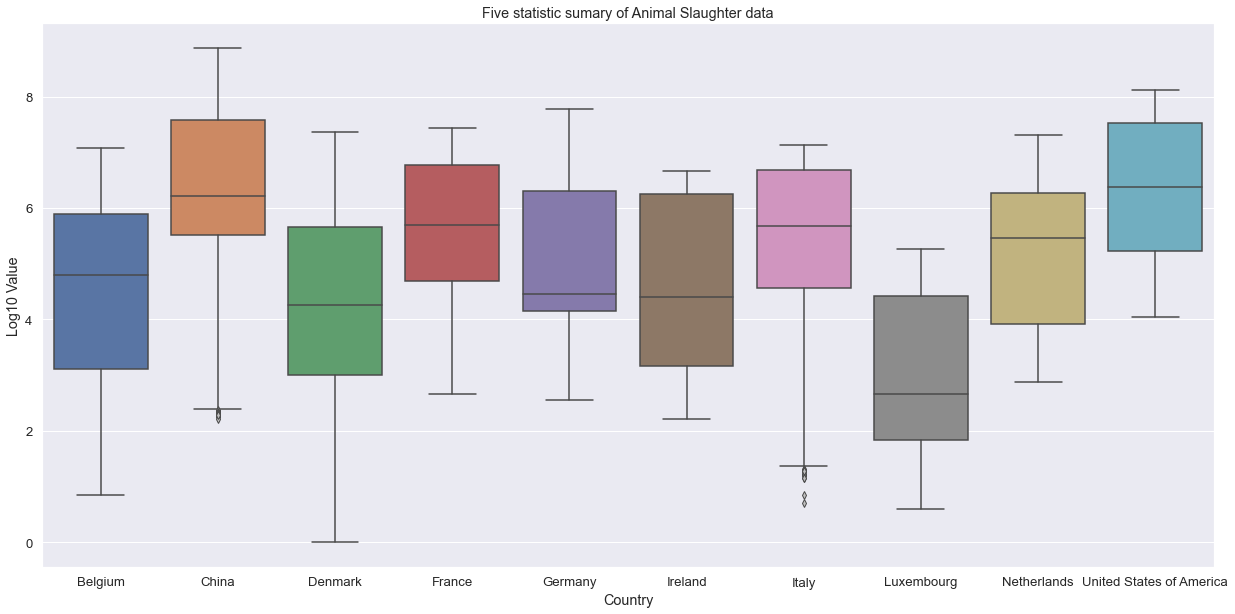

In [173]:
myboxplot(slaughter_clean["Area"],slaughter_clean["LogValue"],"Five statistic sumary of animal slaughter data", "Country",
          "Log10 Value")

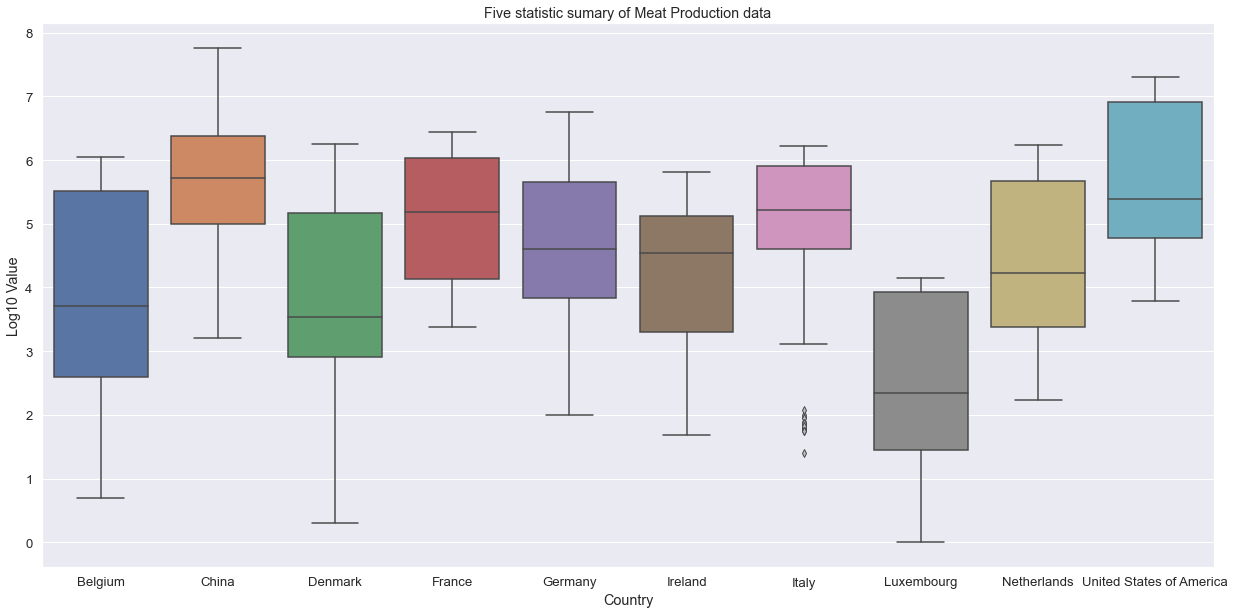

In [174]:
myboxplot(meat_clean["Area"],meat_clean["LogValue"],"Five statistic sumary of meat production data", "Country",
          "Log10 Value")

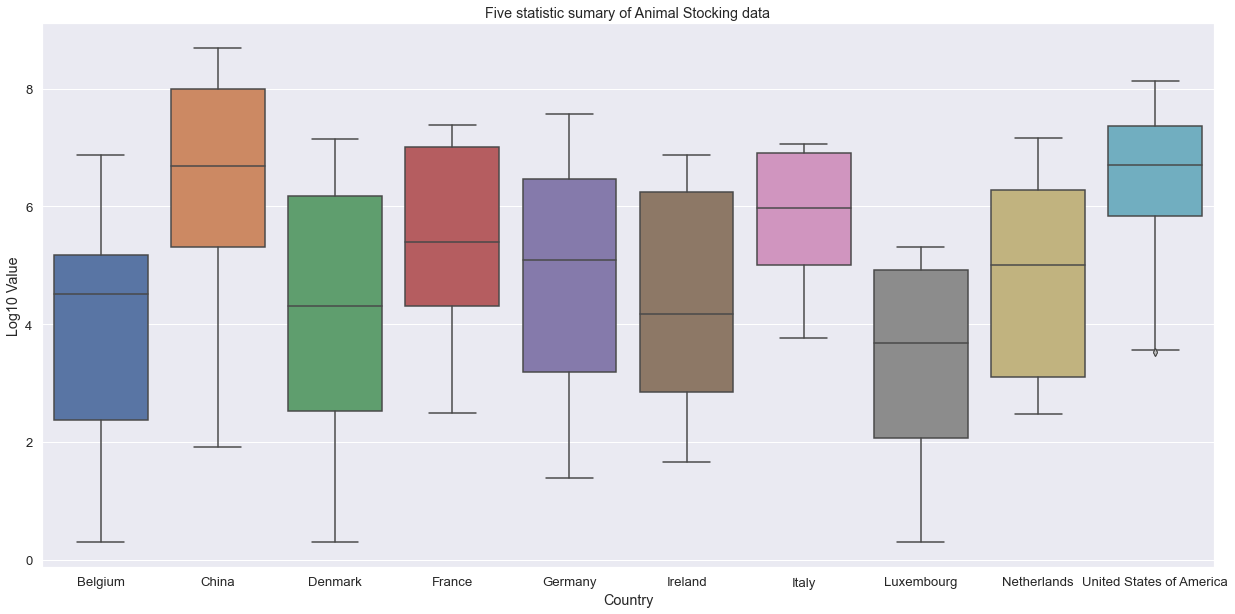

In [175]:
myboxplot(stock_clean["Area"],stock_clean["LogValue"],"Five statistic sumary of animal stocking data", "Country",
          "Log10 Value")

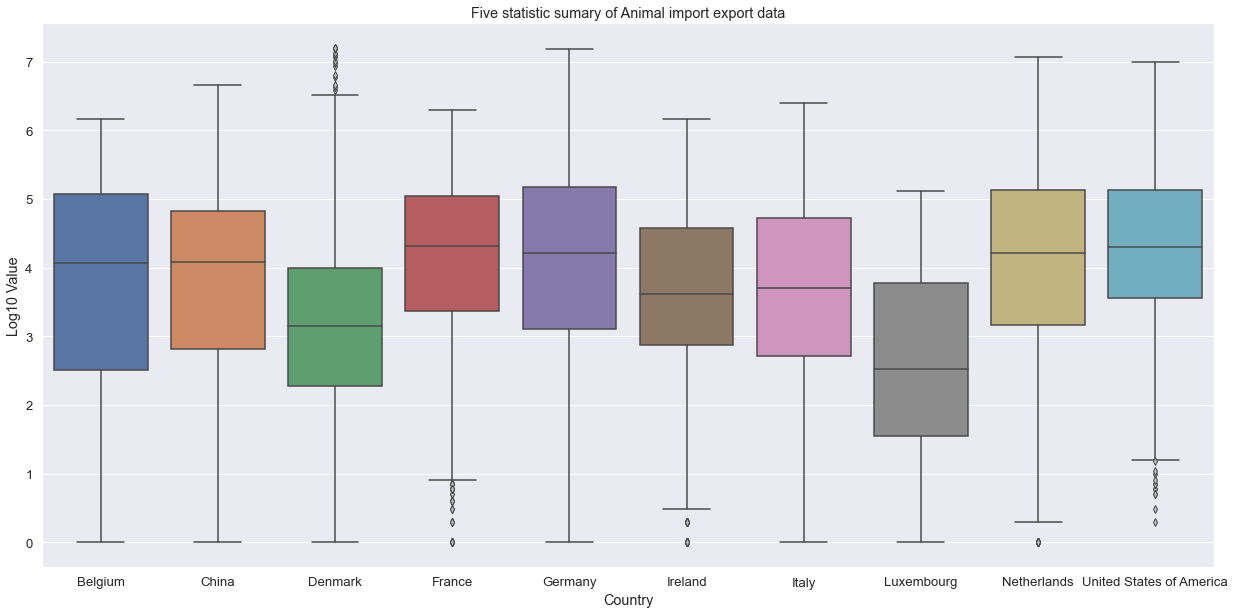

In [176]:
myboxplot(imp_exp_clean["Area"],imp_exp_clean["LogValue"],"Five statistic sumary of animal import export data", "Country",
          "Log10 Value")

In [ ]:
data = pd.merge(slaughter_clean, meat_clean, how="outer")
data = pd.merge(data, stock_clean, how="outer")
data = pd.merge(data, imp_exp_clean, how="outer")

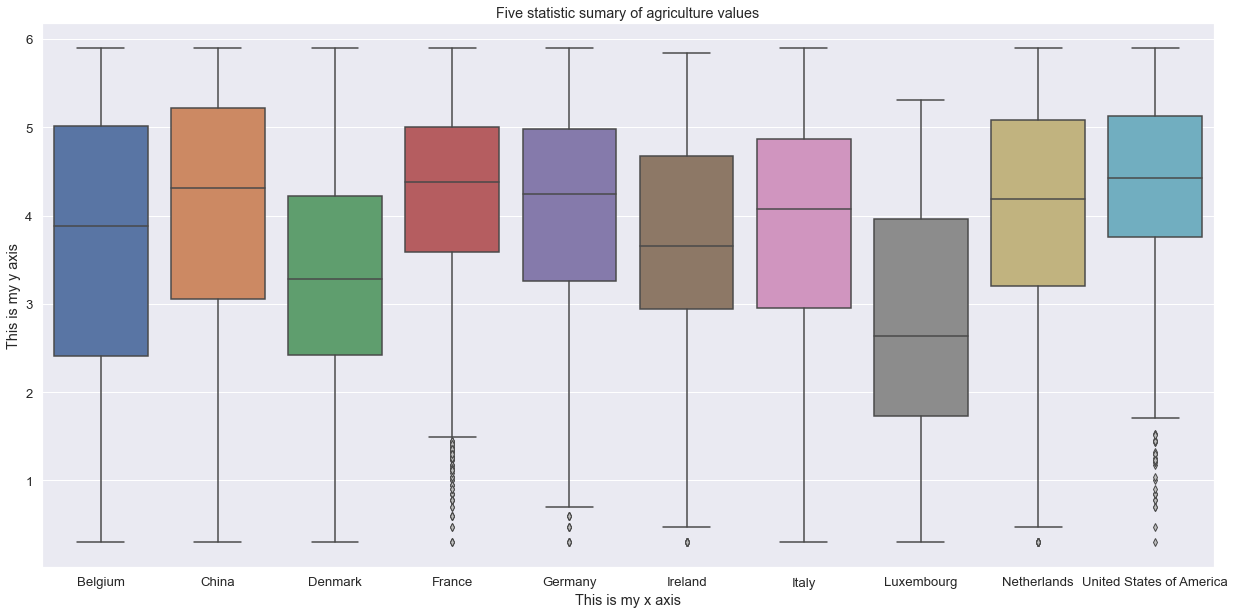

In [171]:
myboxplot(data["Area"],data["LogValue"],"Five statistic sumary of agriculture values", "This is my x axis",
         "This is my y axis")

## Need to be careful with outlier removal, might need to remove them before MERGE

The units on the dataframes are not the same, I need to remove outliers manually.

## Merging the datasets

In [128]:
# Here I merge all thew agricultural datasets into one, as they all have the same column
# names but different categories I have used an outer merge.

data = pd.merge(slaughter_clean, meat_clean, how="outer")
data = pd.merge(data, stock_clean, how="outer")
data = pd.merge(data, imp_exp_clean, how="outer")

In [129]:
data.head()

,Area,Element,Item,Year,Unit,Value,LogValue
0,Belgium,Slaughtered,Cattle,2000,Head,832926.0,5.920606
1,Belgium,Slaughtered,Cattle,2001,Head,873268.0,5.941148
2,Belgium,Slaughtered,Cattle,2002,Head,932473.0,5.969636
3,Belgium,Slaughtered,Cattle,2003,Head,853641.0,5.931275
4,Belgium,Slaughtered,Cattle,2004,Head,842585.0,5.925614


## Dealing with missing values

In [130]:
data.isnull().sum()

Area        0
Element     0
Item        0
Year        0
Unit        0
Value       0
LogValue    0
dtype: int64

The merging of the dataframe has not added any missing or 'null' values

## Checking for outliers and removing them 

In [131]:
data.describe()

,Year,Value,LogValue
count,24113.000000,2.411300e+04,24113.000000
mean,1998.622113,4.295505e+06,4.373872
std,13.879333,3.014413e+07,1.665928
min,1973.000000,1.000000e+00,0.000000
25%,1987.000000,1.681000e+03,3.225568
50%,2000.000000,2.734800e+04,4.436926
75%,2011.000000,3.167090e+05,5.500660
max,2020.000000,7.449179e+08,8.872108


In [133]:
def calculate_IQR(dataframe):
    '''This function takes multiple dataframes as input, calculates the interquartile range (IQR)
    of the 'column' using numpy and returns it'''
    q3, q1 = np.percentile(dataframe, [75, 25])
    IQR = q3 - q1
    return IQR

In [134]:
print(calculate_IQR(data.Value))
print(calculate_IQR(data.LogValue))

315028.0
2.2750926915642697


In [141]:
# This removes the outliers for the 'Value' column
Q3, Q1 = np.percentile(data.Value, [75, 25])
IQR_md = Q3 - Q1

upper_limit_md = Q3 + (IQR_md * 1.5)
lower_limit_md = Q1 - (IQR_md * 1.5)

if lower_limit_md < 1:
    lower_limit_md = 1
else:
    pass
    
data = data[(data['Value'] >= lower_limit_md) &
                                   (data['Value'] <= upper_limit_md)]

print(f"The first quartile is {Q1}")
print(f"The third quartile is {Q3}")
print(f"The inter-quartile range is {IQR_md}")
print(f"The lower boundary is {lower_limit_md}")
print(f"The upper boundary is {upper_limit_md}")

The first quartile is 1681.0
The third quartile is 316709.0
The inter-quartile range is 315028.0
The lower boundary is 1
The upper boundary is 789251.0


In [143]:
# This removes the outliers for the 'LogValue' column, hwowever in this case
# the lower limit has been adjusted to Zero.

# I did not use a loop as it will not return a dataframe when I do, even if I specify
# return dataframe
Q3, Q1 = np.percentile(data.LogValue, [75, 25])
IQR_md = Q3 - Q1

upper_limit_md = Q3 + (IQR_md * 1.5)
lower_limit_md = Q1 - (IQR_md * 1.5)

if lower_limit_md < 0:
    lower_limit_md = 0
else:
    pass
    
data = data[(data['LogValue'] >= lower_limit_md) &
                                   (data['LogValue'] <= upper_limit_md)]

print(f"The first quartile is {Q1}")
print(f"The third quartile is {Q3}")
print(f"The inter-quartile range is {IQR_md}")
print(f"The lower boundary is {lower_limit_md}")
print(f"The upper boundary is {upper_limit_md}")

The first quartile is 2.9556877503135057
The third quartile is 4.903837143659799
The inter-quartile range is 1.9481493933462932
The lower boundary is 0.03346366029406589
The upper boundary is 7.826061233679239


In [144]:
data.describe()

,Year,Value,LogValue
count,19465.000000,19465.000000,19465.000000
mean,1998.751092,78148.074236,3.852358
std,13.908646,145102.353312,1.293945
min,1973.000000,2.000000,0.301030
25%,1987.000000,949.000000,2.977266
50%,2000.000000,10555.000000,4.023458
75%,2011.000000,80800.000000,4.907411
max,2020.000000,789200.000000,5.897187


### Boxplots

## Feature engineering

In [ ]:
# Adding the European average for each EU country

You can't do data quarterly, to add the EU average you'd need to download the aggregate EU totals and divide by the number of member states for the years in question with a function 


### Ideas

In [ ]:
# Set a moving avergae base don 5 years and then classify as above or below this avergae, then see if can predict.

# Import beef prices etc

# Add in whether reccion or not

In [ ]:
# Land yeild FAO
# Production Euro Stat
# GDP numbers from world bank
# see federal reverse.
# USDA beef data

# Appendix

## Variance Script if needed

In [ ]:
#Homogeinity of variance: Levene's test

from scipy.stats import levene

In [ ]:
imp_exp_clean.to_csv("C:\\Users\\shaun\\Desktop\\imp_exp.csv", index=False)

## Save CSV code

In [ ]:
#Clean datasets
slaughter_clean.to_csv("C:\\Users\\shaun\\Desktop\\slaughter.csv", index=False)

meat_clean.to_csv("C:\\Users\\shaun\\Desktop\\meat.csv", index=False)

stock_clean.to_csv("C:\\Users\\shaun\\Desktop\\stock.csv", index=False)

imp_exp_clean.to_csv("C:\\Users\\shaun\\Desktop\\imp_exp.csv", index=False)

In [ ]:
slaughter_pivot.to_csv("C:\\Users\\shaun\\Desktop\\slaughter_pivot.csv")

In [ ]:
slaughter_subset.to_csv("C:\\Users\\shaun\\Desktop\\slaughter_subset.csv")
Meat_subset.to_csv("C:\\Users\\shaun\\Desktop\\Meat_subset.csv")
Livestock_subset.to_csv("C:\\Users\\shaun\\Desktop\\Livestock_subset.csv")
Imp_exp_subset.to_csv("C:\\Users\\shaun\\Desktop\\Imp_exp_subset.csv")

In [ ]:
slaughter_stats.to_csv("C:\\Users\\shaun\\Desktop\\slaughter_stats.csv")
meat_stats.to_csv("C:\\Users\\shaun\\Desktop\\meat_stats.csv")